In [30]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 

from time import time
from datetime import datetime, timedelta

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import seaborn as sns
import copy

from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from keras.layers import Dropout

import keras
from keras.models import model_from_json
from keras.models import load_model

from sklearn import metrics 
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn import set_config   
from sklearn.ensemble import RandomForestClassifier

print("Módulos y clases importados")

Módulos y clases importados


In [31]:
nombresVariables = [
    'Administrative',
    'Administrative_Duration',
    'Informational',
    'Informational_Duration',
    'ProductRelated',
    'ProductRelated_Duration',
    'BounceRates',
    'ExitRates',
    'PageValues',
    'SpecialDay',
    'Month',
    'OperatingSystems',
    'Browser',
    'Region',
    'TrafficType',
    'VisitorType',
    'Weekend',
    'Revenue'
]

#Cargar un dataframe desde una URL
#dataframe = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', sep = ' ', 
#                         names=nombresVariables)
#Cargar un dataframe de un archivo local
dataset = "online_shoppers_intention.csv"
dataframe = pd.read_csv(dataset)

print('cantidad de observaciones (clientes): ',dataframe.shape[0])
print('cantidad de variables: ',dataframe.shape[1])
print(dataframe.shape)
dataframe.head()

cantidad de observaciones (clientes):  12330
cantidad de variables:  18
(12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [32]:
#Se modifica la variable de salida (de estudio): Revenue. Es mejor tener la salida en formato binario cuando hay dos clases
dataframe['Revenue'] = dataframe['Revenue'].replace(2, 0)
dataframe.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [33]:
# Se separa la variable de salida "Y"
Y = dataframe['Revenue']
dataframe = dataframe.drop(['SpecialDay'], axis=1)
dataframe = dataframe.drop(['Region'], axis=1)
dataframe = dataframe.drop(['Browser'], axis=1)

print(dataframe.shape)
dataframe.head()


(12330, 15)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,OperatingSystems,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,Feb,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,Feb,2,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,Feb,4,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,Feb,3,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,Feb,3,4,Returning_Visitor,True,False


<Axes: xlabel='Revenue', ylabel='count'>

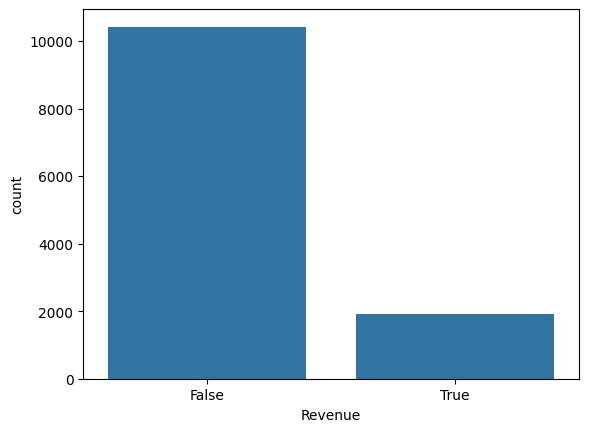

In [34]:
#Se genera una figura de frecuencia de clase, es decir, la cantidad de muestras en cada clase.
sns.countplot(x=Y)

In [35]:
#Determinación de tipos de variables
categorical_ordinal_features = ['Month']
categorical_nominal_features = ['VisitorType']
numeric_features = [
    'Administrative',
    'Administrative_Duration',
    'Informational',
    'Informational_Duration',
    'ProductRelated',
    'ProductRelated_Duration',
    'BounceRates',
    'ExitRates',
    'PageValues',
    'SpecialDay',
    'OperatingSystems',
    'Browser',
    'Region',
    'TrafficType'
]


In [36]:
def analisisVariables(dataframe, categorical_ordinal_features, categorical_nominal_features):
    cantidadTotalVariables = len(dataframe.columns)
    print('Cantidad de variables antes de transformación de variables:', cantidadTotalVariables)

    cantidadVariablesNominales = len(categorical_nominal_features)
    cantidadVariablesBinarias = 0

    for variable in categorical_nominal_features:
        cantidadCategorias = dataframe[variable].nunique()
        cantidadVariablesBinarias += cantidadCategorias
        print('Cantidad de categorías en la variable categórica nominal',
              variable, ':', cantidadCategorias)

    print('Cantidad de variables binarias que reemplazarán a las variables categóricas nominales:',
          cantidadVariablesBinarias)

    cantidadTotalVariablesConTransformacion = (
        cantidadTotalVariables
        - cantidadVariablesNominales
        + cantidadVariablesBinarias
    )

    return cantidadTotalVariablesConTransformacion


In [37]:
dataframe_sin_y = dataframe.drop('Revenue', axis=1)

cantidadTotalVariablesConTransformacion = analisisVariables(
    dataframe_sin_y,
    categorical_ordinal_features,
    categorical_nominal_features
)

print('Cantidad de variables que habrá después de la transformación de variables:',
      cantidadTotalVariablesConTransformacion)


Cantidad de variables antes de transformación de variables: 14
Cantidad de categorías en la variable categórica nominal VisitorType : 3
Cantidad de variables binarias que reemplazarán a las variables categóricas nominales: 3
Cantidad de variables que habrá después de la transformación de variables: 16


In [38]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

# ==============================
# Definición de transformadores
# ==============================

# 1. Preprocesador de variables categóricas a numéricas (ordinales y nominales)

categorical_ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])

categorical_nominal_transformer_ConNombres = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])  # se ignorará una categoría desconocida

preprocesorCategoricoNumericoConNombres = ColumnTransformer(
    transformers=[
        ('catord', categorical_ordinal_transformer, categorical_ordinal_features),
        ('catnom', categorical_nominal_transformer_ConNombres, categorical_nominal_features)
    ],
    remainder='passthrough',
    n_jobs=-1
)

# =============================================
# 2. Normalización y Scaling (MinMaxScaler)
# =============================================

minmax_transformer = Pipeline(steps=[
    ('minmax', MinMaxScaler(feature_range=(0, 1)))
])

preprocesorMinMax = ColumnTransformer(
    transformers=[
        ('tranminmax', minmax_transformer,
         list(range(cantidadTotalVariablesConTransformacion)))
    ],
    remainder='passthrough'
)

# =============================================
# 3. Estandarización (StandardScaler)
# =============================================

standardscaler_transformer = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=True, with_std=True))
])

preprocesorStandardScaler = ColumnTransformer(
    transformers=[
        ('transcaler', standardscaler_transformer,
         list(range(cantidadTotalVariablesConTransformacion)))
    ],
    remainder='passthrough'
)

# =============================================
# 4. Imputación de valores faltantes
# =============================================

simpleimputer_transformer = Pipeline(steps=[
    ('simpleimputer', SimpleImputer(strategy='median'))
    # otras opciones: 'mean', 'most_frequent', 'constant'
])

preprocesorSimpleImputer = ColumnTransformer(
    transformers=[
        ('transimpleimputer', simpleimputer_transformer,
         list(range(cantidadTotalVariablesConTransformacion)))
    ],
    remainder='passthrough'
)


In [39]:
#Construcción de Pipeline con transformadores
pipe = Pipeline(steps=[
    ('prepcn', preprocesorCategoricoNumericoConNombres), 
    ('prepstandard', preprocesorStandardScaler)
    #('prepminmax', preprocesorMinMax)
])

In [40]:
import copy
import pandas as pd

# ===============================
# Se ejecuta el pipeline
# ===============================

dataframeTransformado = copy.deepcopy(dataframe)
X_Transformado = pipe.fit_transform(dataframeTransformado)

print('********** Pipeline aplicado')
print('********** Transformador categórico nominal:')
print(pipe.named_steps['prepcn'].transformers_[1])

# ===============================
# Obtener nombres reales de columnas
# ===============================

cnamesDataset1 = pipe.named_steps['prepcn'].get_feature_names_out()

print('********** Cantidad de variables:', len(cnamesDataset1))
print('********** Lista de variables:')
print(cnamesDataset1)

# ===============================
# Crear DataFrame transformado
# ===============================

dataframeTransformado = pd.DataFrame(
    data=X_Transformado,
    columns=cnamesDataset1
)

# ===============================
# Guardar dataset sin etiquetas
# ===============================

dataframeTransformado.to_csv(
    "DatasetTransformadoSinEtiquetas.csv",
    sep=";",
    index=False
)

# ===============================
# Agregar la variable de salida
# ===============================

dataframeTransformado = pd.concat(
    [dataframeTransformado, Y.reset_index(drop=True)],
    axis=1
)

# ===============================
# Guardar dataset con etiquetas
# ===============================

dataframeTransformado.to_csv(
    "DatasetTransformadoConEtiquetas.csv",
    sep=";",
    index=False
)

dataframeTransformado.head()


********** Pipeline aplicado
********** Transformador categórico nominal:
('catnom', Pipeline(steps=[('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))]), ['VisitorType'])
********** Cantidad de variables: 17
********** Lista de variables:
['catord__Month' 'catnom__VisitorType_New_Visitor'
 'catnom__VisitorType_Other' 'catnom__VisitorType_Returning_Visitor'
 'remainder__Administrative' 'remainder__Administrative_Duration'
 'remainder__Informational' 'remainder__Informational_Duration'
 'remainder__ProductRelated' 'remainder__ProductRelated_Duration'
 'remainder__BounceRates' 'remainder__ExitRates' 'remainder__PageValues'
 'remainder__OperatingSystems' 'remainder__TrafficType'
 'remainder__Weekend' 'remainder__Revenue']


,catord__Month,catnom__VisitorType_New_Visitor,catnom__VisitorType_Other,catnom__VisitorType_Returning_Visitor,remainder__Administrative,remainder__Administrative_Duration,remainder__Informational,remainder__Informational_Duration,remainder__ProductRelated,remainder__ProductRelated_Duration,remainder__BounceRates,remainder__ExitRates,remainder__PageValues,remainder__OperatingSystems,remainder__TrafficType,remainder__Weekend,remainder__Revenue,Revenue
0,-1.334959,-0.399087,-0.083316,0.410621,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-1.233426,-0.762629,-0.550552,False,False
1,-1.334959,-0.399087,-0.083316,0.410621,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.136078,-0.514182,-0.550552,False,False
2,-1.334959,-0.399087,-0.083316,0.410621,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,2.058618,-0.265735,-0.550552,False,False
3,-1.334959,-0.399087,-0.083316,0.410621,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.99461,-0.317178,0.96127,-0.017289,-0.550552,False,False
4,-1.334959,-0.399087,-0.083316,0.410621,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.29643,-0.045196,0.142551,-0.317178,0.96127,-0.017289,1.81636,False,False


In [41]:
# Funciones para guardar y cargar un Pipeline o Modelo
def guardarPipeline(pipeline,nombreArchivo):
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [42]:
guardarPipeline(pipe,'pipePreprocesadores')

In [43]:
def cargarPipeline(nombreArchivo):
    with open(nombreArchivo+'.pickle', 'rb') as handle:
        pipeline = pickle.load(handle)
    return pipeline

In [44]:
nombreArchivoPreprocesador='pipePreprocesadores'
pipe=None
pipe=cargarPipeline(nombreArchivoPreprocesador) #Debes incluir el archivo del Pipeline en el mismo directorio del script 
cantidadPasos=len(pipe.steps)
print("Cantidad de pasos: ",cantidadPasos)
set_config(display='diagram')
pipe

Cantidad de pasos:  2


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prepcn', ...), ('prepstandard', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('catord', ...), ('catnom', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different t

## RANDOM FOREST

In [45]:
#Se identifica la cantidad de variables para crear la capa de entrada de la red neuronal
nombrePrep='prepstandard'#prepcn, prepminmax, prepstandard
cantidadVariablesIndependientes = len(pipe.named_steps[nombrePrep].transformers_[0][2])
print("\nCantidad de variables después de preprocesamiento: ",cantidadVariablesIndependientes)


Cantidad de variables después de preprocesamiento:  16


In [46]:
#Se inserta un paso al final indicando el índice
pipe.steps.insert(cantidadPasos,['modelRandomForest',RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)])

#Se pudo haber insertado el clasificador directamente al final con append:
#pipe.steps.append(['modelRandomForest',RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)])

#Se puede eliminar el paso del índice 4 de la siguiente manera
#pipe.steps.pop(4)

print("Cantidad de pasos: ",len(pipe.steps))
print(pipe.steps)

Cantidad de pasos:  3
[('prepcn', ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('catord',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder())]),
                                 ['Month']),
                                ('catnom',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['VisitorType'])])), ('prepstandard', ColumnTransformer(remainder='passthrough',
                  transformers=[('transcaler',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                  14, 15])])), ['modelRandomForest', RandomForestClassifi

## Entrenamiento del Modelo

In [47]:
Yval=Y.values
X=copy.deepcopy(dataframe)

X_train, X_test, y_train, y_test = train_test_split(X, Yval, test_size = 0.2)#random_state = 0

#dataX=copy.deepcopy(dataframe)
#dataY=copy.deepcopy(Y)
#X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size = 0.2, random_state = 0)

X_train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,OperatingSystems,TrafficType,VisitorType,Weekend,Revenue
6816,1,156.200000,0,0.0,3,50.400000,0.000000,0.000000,92.976241,Oct,2,2,Returning_Visitor,True,True
8366,5,125.750000,0,0.0,44,1113.309524,0.008333,0.015625,18.916073,Dec,3,1,Returning_Visitor,False,False
3935,6,142.300000,0,0.0,108,1479.083333,0.001786,0.007143,0.000000,May,2,6,Returning_Visitor,False,False
2302,0,0.000000,0,0.0,21,358.250000,0.038095,0.075238,0.000000,May,2,2,Returning_Visitor,False,False
11585,5,172.849265,0,0.0,33,2002.814281,0.000000,0.029567,18.133883,Nov,2,11,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11319,5,106.000000,0,0.0,44,646.825000,0.007407,0.028852,0.000000,Dec,3,13,Returning_Visitor,False,False
7579,6,285.900000,0,0.0,13,291.300000,0.000000,0.012500,53.114421,Nov,1,2,New_Visitor,False,True
5448,3,35.500000,0,0.0,14,241.769231,0.000000,0.020417,0.000000,May,3,2,Returning_Visitor,False,False
9887,7,237.500000,1,0.0,37,1302.518056,0.005952,0.023186,0.000000,Dec,3,2,Returning_Visitor,False,True


In [48]:
modeloEntrenado = pipe.fit(X_train, y_train)

In [49]:
y_pred = pipe.predict(X_test)
y_pred

array([False, False, False, ...,  True, False, False], shape=(2466,))

In [50]:
dataframeFinal=pd.DataFrame({'real':y_test, 'predicción': y_pred})

np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})

dataframeFinal.head(20)

,real,predicción
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,True,True
9,False,False


In [51]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
accuracy=str(accuracy_score(y_test, y_pred))

MAE=str(round(MAE, 4))
MSE=str(round(MSE, 4))
RMSE=str(round(RMSE, 4))

print('Mean Absolute Error (MAE):', MAE)  
print('Mean Squared Error (MSE):', MSE)  
print('Root Mean Squared Error (RMSE):', RMSE) 
print('Accuracy: ' + accuracy) 

print('Confusion_matrix:')
y_test_transformado = y_test
y_pred_transformado = y_pred

cm = confusion_matrix(y_test_transformado, y_pred_transformado)  
print(cm)  
tn, fp, fn, tp = confusion_matrix(y_test_transformado, y_pred_transformado).ravel()  
print(tn,fp,fn,tp)

precision=precision_score(y_test_transformado, y_pred_transformado)
precision=str(round(precision, 4))
print('Precision:',precision)

recall=recall_score(y_test_transformado, y_pred_transformado)
recall=str(round(recall, 4))
print('Recall:',recall)

f1=f1_score(y_test_transformado, y_pred_transformado)
f1=str(round(f1, 4))
print('F1:',f1)

Mean Absolute Error (MAE): 0.0004
Mean Squared Error (MSE): 0.0004
Root Mean Squared Error (RMSE): 0.0201
Accuracy: 0.9995944849959448
Confusion_matrix:
[[2124    0]
 [   1  341]]
2124 0 1 341
Precision: 1.0
Recall: 0.9971
F1: 0.9985


In [52]:
#Se carga el pipeline que contiene solamente los pasos de preparación de datos
pipe=cargarPipeline(nombreArchivoPreprocesador)
print("Cantidad de pasos: ",len(pipe.steps))
X=copy.deepcopy(dataframe)

estimator = RandomForestClassifier(n_estimators=10, max_depth=5)
pipe.steps.append(['modelRandomForest',estimator])

# Fija las semillas aleatorias para la reproducibilidad
sd = 0
numFolds=5
np.random.seed(sd)

from sklearn.model_selection import ShuffleSplit
kfold = ShuffleSplit(n_splits=numFolds, test_size=0.2, random_state=sd)

#cv es la cantidad de veces de entrenamiento del modelo
#n_jobs es para ocupar mas de un procesador. El parámetro -1 indica que queremos utilizar todos los procesadores disponibles
cvs=cross_val_score(pipe, X, Y, cv=kfold, n_jobs=-1, error_score='raise')
print("Scores:")# accuracy
for i in range(numFolds):
    print(cvs[i])
print("Media de scores: ", cvs.mean())

Cantidad de pasos:  2
Scores:
0.994728304947283
1.0
1.0
1.0
1.0
Media de scores:  0.9989456609894566


# GRID SEARCH

In [53]:
#Para revisar todos los parámetros existentes en el Pipeline
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'prepcn', 'prepstandard', 'modelRandomForest', 'prepcn__force_int_remainder_cols', 'prepcn__n_jobs', 'prepcn__remainder', 'prepcn__sparse_threshold', 'prepcn__transformer_weights', 'prepcn__transformers', 'prepcn__verbose', 'prepcn__verbose_feature_names_out', 'prepcn__catord', 'prepcn__catnom', 'prepcn__catord__memory', 'prepcn__catord__steps', 'prepcn__catord__transform_input', 'prepcn__catord__verbose', 'prepcn__catord__ordinal', 'prepcn__catord__ordinal__categories', 'prepcn__catord__ordinal__dtype', 'prepcn__catord__ordinal__encoded_missing_value', 'prepcn__catord__ordinal__handle_unknown', 'prepcn__catord__ordinal__max_categories', 'prepcn__catord__ordinal__min_frequency', 'prepcn__catord__ordinal__unknown_value', 'prepcn__catnom__memory', 'prepcn__catnom__steps', 'prepcn__catnom__transform_input', 'prepcn__catnom__verbose', 'prepcn__catnom__onehot', 'prepcn__catnom__onehot__categories', 'prepcn__catnom__onehot__drop', '

In [54]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import GridSearchCV

tic = time()

#Diseño de experimentos: diseño de los valores a probar en cada parámetro
#strategy = ['mean', 'median', 'constant', 'most_frequent']
#feature_range = [(0, 1), (-1, 1), (1, 5)]
with_mean = [True,False]
with_std = [True,False]
n_estimators = [20, 40, 60, 80, 100, 150, 200]
max_depth = [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40]

param_grid = {
    'prepstandard__transcaler__scaler__with_mean': with_mean,
    'prepstandard__transcaler__scaler__with_std': with_std,
    'modelRandomForest__n_estimators': n_estimators,
    'modelRandomForest__max_depth': max_depth,
}

#Se define un GridSearchCV indicando el Pipeline, la lista de parámetros a probar y la cantidad de Folds con cv
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)

#Se ejecutan los experimentos, el tiempo total se presenta en segundos, posteriormente se presentará en un formato más adecuado
gs.fit(X_train, y_train)
gs_time = time() - tic
print(gs_time)

375.91327261924744


In [55]:
print(gs)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prepcn',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='passthrough',
                                                          transformers=[('catord',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder())]),
                                                                         ['Month']),
                                                                        ('catnom',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                       

In [56]:
print(f"Mejores parámetros:")
print(gs.best_params_)

print(("\nMedia del score (accuracy) del modelo de grid search: %.3f"
       % gs.score(X_test, y_test)))

Mejores parámetros:
{'modelRandomForest__max_depth': 4, 'modelRandomForest__n_estimators': 20, 'prepstandard__transcaler__scaler__with_mean': True, 'prepstandard__transcaler__scaler__with_std': False}

Media del score (accuracy) del modelo de grid search: 1.000


In [57]:
print(f"Mejor score: {gs.best_score_:.3f}")

Mejor score: 1.000


In [58]:
cv_results= pd.DataFrame(gs.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modelRandomForest__max_depth,param_modelRandomForest__n_estimators,param_prepstandard__transcaler__scaler__with_mean,param_prepstandard__transcaler__scaler__with_std,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.195225,0.260709,0.150463,0.266825,2,20,True,True,"{'modelRandomForest__max_depth': 2, 'modelRand...",0.959959,0.972124,0.995945,1.000000,1.000000,0.985606,0.016497,284
1,0.077365,0.020588,0.019914,0.005061,2,20,True,False,"{'modelRandomForest__max_depth': 2, 'modelRand...",0.990370,1.000000,0.970096,0.956412,0.970588,0.977493,0.015615,302
2,0.073130,0.027441,0.017043,0.001417,2,20,False,True,"{'modelRandomForest__max_depth': 2, 'modelRand...",0.932083,0.981754,0.984288,0.982261,0.996957,0.975469,0.022394,305
3,0.062589,0.012700,0.016274,0.000469,2,20,False,False,"{'modelRandomForest__max_depth': 2, 'modelRand...",0.976178,0.988849,1.000000,0.980740,0.965517,0.982257,0.011643,289
4,0.107184,0.022874,0.022706,0.007325,2,40,True,True,"{'modelRandomForest__max_depth': 2, 'modelRand...",0.988849,0.970603,0.950836,0.969589,0.990365,0.974049,0.014532,307


In [59]:
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[["mean_test_score", "std_test_score",
            "param_modelRandomForest__n_estimators",
            "param_modelRandomForest__max_depth"
            ]].head(20)

,mean_test_score,std_test_score,param_modelRandomForest__n_estimators,param_modelRandomForest__max_depth
307,1.0,0.0,200,40
306,1.0,0.0,200,40
289,1.0,0.0,60,40
288,1.0,0.0,60,40
287,1.0,0.0,40,40
286,1.0,0.0,40,40
285,1.0,0.0,40,40
284,1.0,0.0,40,40
283,1.0,0.0,20,40
282,1.0,0.0,20,40


0 días: 0 horas: 6 min: 15 seg


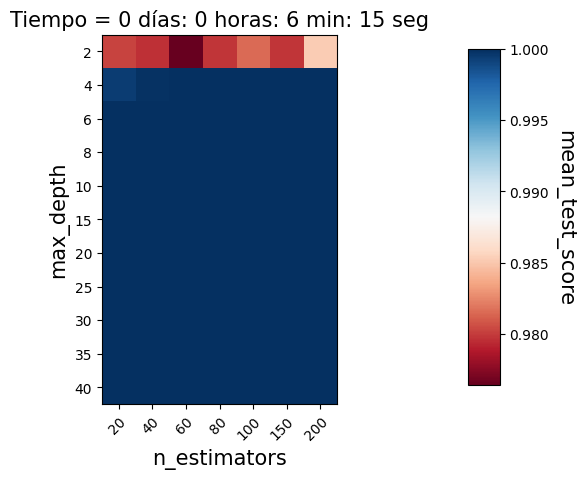

In [60]:
def make_heatmap(ax, gs, is_sh=False, make_cbar=False, cmap='GnBu'):
    results=cv_results
    scores_matrix = pd.pivot_table(data=cv_results.sort_values('mean_test_score', ascending=True),
                                   index='param_modelRandomForest__max_depth', 
                                   #columns='param_prepsimpleimputer__transimpleimputer__simpleimputer__strategy',
                                   #columns='param_prepminmax__tranminmax__minmax__feature_range', 
                                   columns='param_modelRandomForest__n_estimators', 
                                   values='mean_test_score')
    im = ax.imshow(scores_matrix, cmap=cmap)
    z=results['mean_test_score']
    z_min, z_max = -np.abs(z).max(), np.abs(z).max()   
    #ax.set_xticks(np.arange(len(feature_range)))
    #ax.set_xticklabels([x for x in feature_range])
    #ax.set_xlabel('feature_range', fontsize=15)   
    ax.set_xticks(np.arange(len(n_estimators)))
    ax.set_xticklabels([x for x in n_estimators])
    ax.set_xlabel('n_estimators', fontsize=15)    
    ax.set_yticks(np.arange(len(max_depth)))
    ax.set_yticklabels(['{0:0.00f}'.format(x) for x in max_depth])
    ax.set_ylabel('max_depth', fontsize=15)
    # Para girar las etiquetas de las marcas y establecer su alineación
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")  
    if make_cbar:
        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
        fig.colorbar(im, cax=cbar_ax)
        cbar_ax.set_ylabel('mean_test_score', rotation=-90, va="bottom",
                           fontsize=15)

fig, axes = plt.subplots(ncols=1, sharey=True)
ax2 = axes

make_heatmap(ax2, gs, make_cbar=True, cmap='RdBu')
#Otros valores de colormaps: 'GnBu', 'RdBu', 'viridis', 'cividis'

from datetime import datetime, timedelta

def GetTime(sec):
    d = datetime(1,1,1) + sec
    tiempoTotal=("%d días: %d horas: %d min: %d seg" % (d.day-1, d.hour, d.minute, d.second))
    return tiempoTotal

sec=timedelta(seconds=gs_time)
tiempoTotal=GetTime(sec)
print(tiempoTotal)
ax2.set_title('Tiempo = '+tiempoTotal, fontsize=15)
plt.show()

In [61]:
#Se elimina el modelo Random Forest base
pipe.steps.pop()
#Se agrega el clasificador Random Forest optimizado al final
pipe.steps.append(['modelRandomForest',RandomForestClassifier(n_estimators=200, max_depth=25, random_state=0)])

print("Cantidad de pasos: ",len(pipe.steps))
#print(pipe.steps)

X_train, X_test, y_train, y_test = train_test_split(X, Yval, test_size = 0.2, random_state = 0)

modeloEntrenado = pipe.fit(X_train, y_train)
print('Entrenamiento listo')

Cantidad de pasos:  3
Entrenamiento listo


In [76]:
import pandas as pd

def predecirNuevaSesion(
    Administrative=0,
    Administrative_Duration=0.0,
    Informational=0,
    Informational_Duration=0.0,
    ProductRelated=1,
    ProductRelated_Duration=64.0,
    BounceRates=0.02,
    ExitRates=0.03,
    PageValues=0.0,
    SpecialDay=0.0,
    Month='May',
    OperatingSystems=2,
    Browser=1,
    Region=1,
    TrafficType=1,
    VisitorType='Returning_Visitor',
    Weekend=False
):
    # Usar exactamente las columnas con las que se entrenó el modelo
    columnas = X.columns.tolist()

    Xnew_df = pd.DataFrame([{
        'Administrative': Administrative,
        'Administrative_Duration': Administrative_Duration,
        'Informational': Informational,
        'Informational_Duration': Informational_Duration,
        'ProductRelated': ProductRelated,
        'ProductRelated_Duration': ProductRelated_Duration,
        'BounceRates': BounceRates,
        'ExitRates': ExitRates,
        'PageValues': PageValues,
        'SpecialDay': SpecialDay,
        'Month': Month,
        'OperatingSystems': OperatingSystems,
        'Browser': Browser,
        'Region': Region,
        'TrafficType': TrafficType,
        'VisitorType': VisitorType,
        'Weekend': Weekend
    }], columns=columnas)

    # Predicción de Revenue
    pred = pipe.predict(Xnew_df)

    return int(pred[0])  # 0 = no compra, 1 = compra


In [77]:
resultado = predecirNuevaSesion(
    ProductRelated=10,
    ProductRelated_Duration=600,
    PageValues=45,
    VisitorType='Returning_Visitor',
    Weekend=True
)

print("Revenue predicho:", resultado)


Revenue predicho: 0


# Red Neuronal CNN con Integrated Gradients

In [93]:
import tensorflow as tf
import numpy as np


def integrated_gradients(
    model,
    x,
    baseline=None,
    steps=50
):
    """
    model: CNN entrenada
    x: sample (1, n_features)
    baseline: punto de referencia (default = ceros)
    steps: número de interpolaciones
    """

    if baseline is None:
        baseline = tf.zeros(shape=x.shape)

    # Escalado lineal entre baseline y x
    interpolated_inputs = [
        baseline + (float(i) / steps) * (x - baseline)
        for i in range(steps + 1)
    ]

    interpolated_inputs = tf.concat(interpolated_inputs, axis=0)

    with tf.GradientTape() as tape:
        tape.watch(interpolated_inputs)
        preds = model(interpolated_inputs)

    grads = tape.gradient(preds, interpolated_inputs)

    avg_grads = tf.reduce_mean(grads, axis=0)

    integrated_grads = (x - baseline) * avg_grads

    return integrated_grads.numpy()


In [107]:
X_sample_raw = X_test.iloc[[0]]

X_sample_proc = pipe.named_steps['prepcn'].transform(X_sample_raw)


In [108]:
X_sample_tensor = tf.convert_to_tensor(
    X_sample_proc,
    dtype=tf.float32
)


In [ ]:
ig = integrated_gradients(
    model=modeloEntrenado,
    x=X_sample_tensor,
    steps=100
)

TypeError: 'Pipeline' object is not callable

In [ ]:
importancias = ig[0]

resultado_ig = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

resultado_ig


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(
    resultado_ig['Variable'],
    resultado_ig['Importancia']
)
plt.title("Gradientes Integrados - Predicción Revenue")
plt.xlabel("Importancia")
plt.show()
